In [4]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from ISLP.models import (ModelSpec as MS,
                         summarize,
                         poly)
import matplotlib.pyplot as plt

In [30]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)
np.corrcoef(x1, x2)

array([[1.       , 0.7723245],
       [0.7723245, 1.       ]])

In [29]:
x1 = np.concatenate([x1, [0.1]])
x2 = np.concatenate([x2, [0.8]])
y = np.concatenate([y, [6]])
np.corrcoef(x1, x2)

array([[1.        , 0.67891508],
       [0.67891508, 1.        ]])

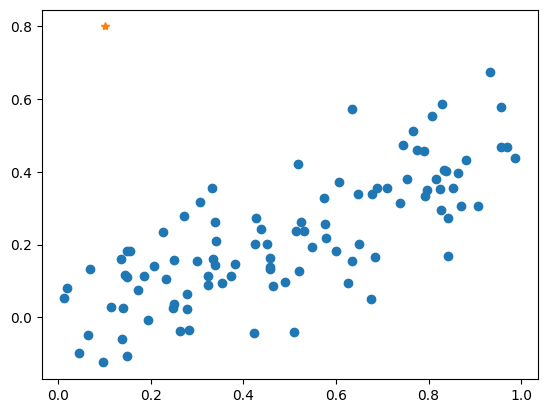

In [31]:
plt.plot(x1, x2, 'o', 0.1, 0.8, '*')

In [32]:
df = pd.DataFrame(data={'x1':x1, 'x2':x2, 'y':y})
df

,x1,x2,y
0,0.956002,0.469359,4.356977
1,0.207682,0.142509,3.677789
2,0.828445,0.587699,3.482079
3,0.149282,0.181141,2.369093
4,0.512805,0.236458,1.413295
...,...,...,...
95,0.427256,0.273142,3.940722
96,0.790513,0.456659,3.460998
97,0.531602,0.236308,3.355095
98,0.013037,0.054343,2.336922


In [33]:
X = MS(['x1', 'x2']).fit_transform(df)
y = df['y']
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


15

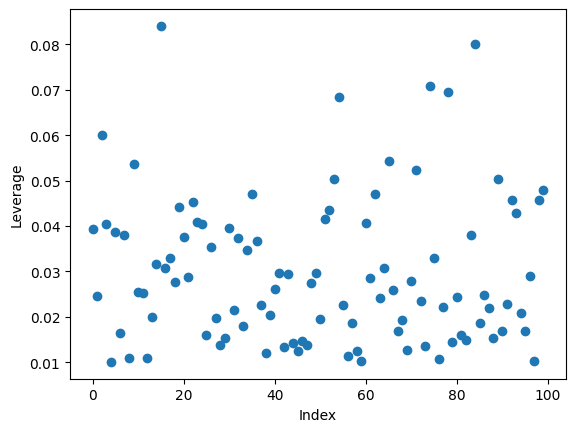

In [34]:
infl = results.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [35]:
X = MS(['x1']).fit_transform(df)
y = df['y']
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
intercept,1.9371,0.189,10.242,0.0
x1,2.0771,0.335,6.196,0.0


52

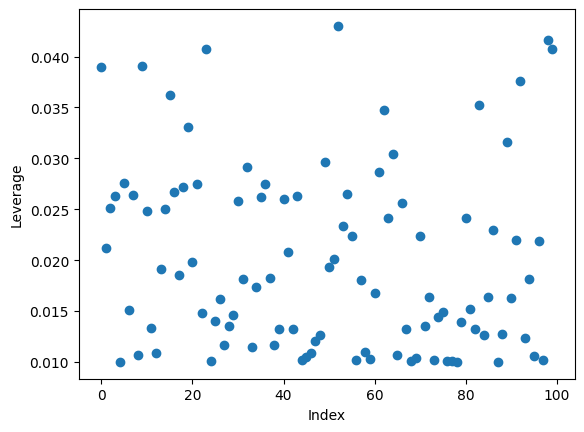

In [36]:
infl = results.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [37]:
X = MS(['x2']).fit_transform(df)
y = df['y']
model = sm.OLS(y, X);
results = model.fit();
summarize(results)

,coef,std err,t,P>|t|
intercept,2.3239,0.154,15.124,0.0
x2,2.9103,0.550,5.291,0.0


100

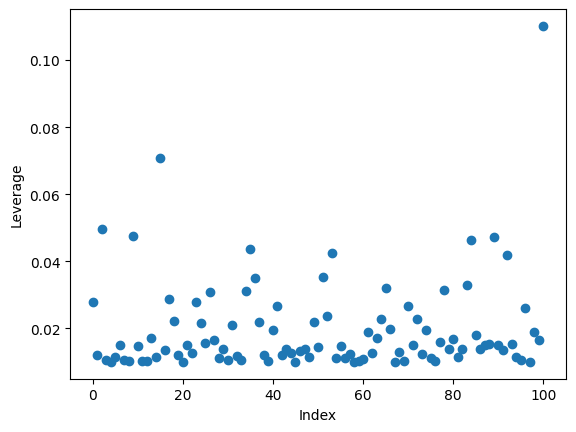

In [27]:
infl = results.get_influence()
ax = plt.subplots()[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)